#Importing and Understanding the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('personality_dataset.csv')
data['Going_outside'] = (data['Going_outside']*10)/7 #Scaling it up to a scale 1-10 because in the data its on a scale 1-7
display(data)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


(2098, 8)


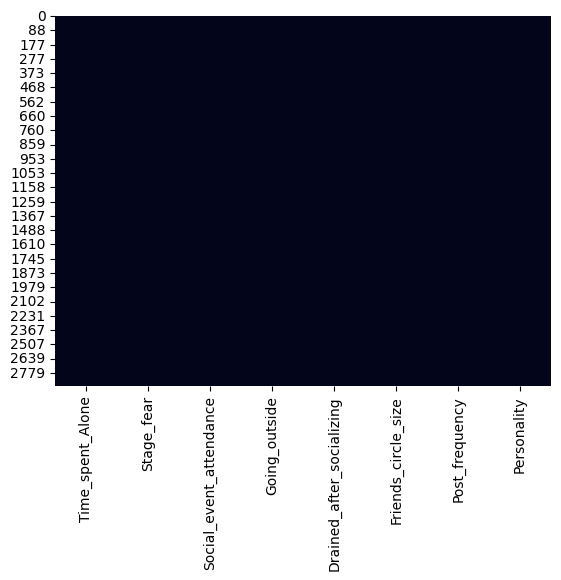

In [21]:
#The size and columns of the data before data cleaning
print(data.shape)
data.columns
data
sns.heatmap(data.isnull(), cbar=False)
plt.show()

From this heatmap we can conclude that the missing values are scattered at random across the dataset and is MCAR so we can just directly remove them without having to worry about biasing

#FILTERING MISSING VALUES AND DUPLICATE VALUES

In [5]:
#Removing duplicate values
print(f"Original number of duplicate values:{data.duplicated().sum()}")
data.drop_duplicates(inplace = True)
data.duplicated().sum()

Original number of missing values:388


np.int64(0)

In [6]:
#Removing missing values
print(f'Original number of missing or null values:{data.isnull().sum()}')
data.dropna(inplace = True)
data.isnull().sum()

Original number of missing or null values:Time_spent_Alone             61
Stage_fear                   73
Social_event_attendance      61
Going_outside                65
Drained_after_socializing    51
Friends_circle_size          75
Post_frequency               63
Personality                   0
dtype: int64


,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [7]:
data.shape #802 rows of incomplete data removed

(2098, 8)

#Handling Outliers

In [8]:
#Using InterQuartile Range to determine outliers
Q1 = data['Time_spent_Alone'].quantile(0.25)
Q3 = data['Time_spent_Alone'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(data[(data['Time_spent_Alone'] < lower_bound) | (data['Time_spent_Alone'] > upper_bound)])

Empty DataFrame
Columns: [Time_spent_Alone, Stage_fear, Social_event_attendance, Going_outside, Drained_after_socializing, Friends_circle_size, Post_frequency, Personality]
Index: []


In [9]:
Q1 = data['Social_event_attendance'].quantile(0.25)
Q3 = data['Social_event_attendance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(data[(data['Social_event_attendance'] < lower_bound) | (data['Social_event_attendance'] > upper_bound)])

Empty DataFrame
Columns: [Time_spent_Alone, Stage_fear, Social_event_attendance, Going_outside, Drained_after_socializing, Friends_circle_size, Post_frequency, Personality]
Index: []


In [10]:
Q1 = data['Friends_circle_size'].quantile(0.25)
Q3 = data['Friends_circle_size'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(data[(data['Friends_circle_size'] < lower_bound) | (data['Friends_circle_size'] > upper_bound)])

Empty DataFrame
Columns: [Time_spent_Alone, Stage_fear, Social_event_attendance, Going_outside, Drained_after_socializing, Friends_circle_size, Post_frequency, Personality]
Index: []


In [11]:
Q1 = data['Going_outside'].quantile(0.25)
Q3 = data['Going_outside'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(data[(data['Going_outside'] < lower_bound) | (data['Going_outside'] > upper_bound)])

Empty DataFrame
Columns: [Time_spent_Alone, Stage_fear, Social_event_attendance, Going_outside, Drained_after_socializing, Friends_circle_size, Post_frequency, Personality]
Index: []


In [12]:
Q1 = data['Post_frequency'].quantile(0.25)
Q3 = data['Post_frequency'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(data[(data['Post_frequency'] < lower_bound) | (data['Post_frequency'] > upper_bound)])

Empty DataFrame
Columns: [Time_spent_Alone, Stage_fear, Social_event_attendance, Going_outside, Drained_after_socializing, Friends_circle_size, Post_frequency, Personality]
Index: []


No outliers in our data so none to remove

#Exploring Data Characteristics and Data Transformation

In [13]:
display(data.describe())


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2098.000000,2098.000000,2098.000000,2098.000000,2098.00000
mean,4.186368,4.228313,4.638431,6.617731,3.86082
std,3.454599,2.902783,3.222155,4.354215,2.95341
min,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,2.000000,1.428571,3.000000,1.00000
50%,3.000000,4.000000,4.285714,6.000000,3.00000
75%,7.000000,7.000000,7.142857,10.000000,6.00000
max,11.000000,10.000000,10.000000,15.000000,10.00000


<class 'pandas.core.frame.DataFrame'>
Index: 2098 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2098 non-null   float64
 1   Stage_fear                 2098 non-null   object 
 2   Social_event_attendance    2098 non-null   float64
 3   Going_outside              2098 non-null   float64
 4   Drained_after_socializing  2098 non-null   object 
 5   Friends_circle_size        2098 non-null   float64
 6   Post_frequency             2098 non-null   float64
 7   Personality                2098 non-null   object 
dtypes: float64(5), object(3)
memory usage: 147.5+ KB


None

In [22]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2098 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2098 non-null   float64
 1   Stage_fear                 2098 non-null   int64  
 2   Social_event_attendance    2098 non-null   float64
 3   Going_outside              2098 non-null   float64
 4   Drained_after_socializing  2098 non-null   int64  
 5   Friends_circle_size        2098 non-null   float64
 6   Post_frequency             2098 non-null   float64
 7   Personality                2098 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 147.5 KB


None

In [18]:
# Normalizing numerical features from 0-1 using a min max scaler
scaler = MinMaxScaler()
feature_columns = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
data[feature_columns] = scaler.fit_transform(data[feature_columns])
#One Hot encoding the labels in the categorical features
data['Drained_after_socializing'] = data['Drained_after_socializing'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Stage_fear'] = data['Stage_fear'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Personality'] = data['Personality'].apply(lambda x: 1 if x == 'Extrovert' else 0)
display(data)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.363636,0,0.4,0.857143,0,0.866667,0.5,1
1,0.818182,0,0.0,0.000000,0,0.000000,0.3,0
2,0.818182,0,0.1,0.285714,0,0.333333,0.2,0
3,0.000000,0,0.6,1.000000,0,0.933333,0.8,1
4,0.272727,0,0.9,0.571429,0,0.533333,0.5,1
...,...,...,...,...,...,...,...,...
2888,0.454545,0,0.0,0.142857,0,0.066667,0.0,0
2889,0.545455,0,0.0,0.000000,0,0.200000,0.0,0
2896,0.272727,0,0.8,0.428571,0,0.933333,0.9,1
2897,0.363636,0,0.1,0.142857,0,0.266667,0.0,0


All the given data shows that higher values indicate extroverted personalities and lower values of the data indicate introverted personalities so keeping this in mind I encoded introverted categorical data as 0 and extroverted categorical data as 1

#Visualising the Data


<Axes: >

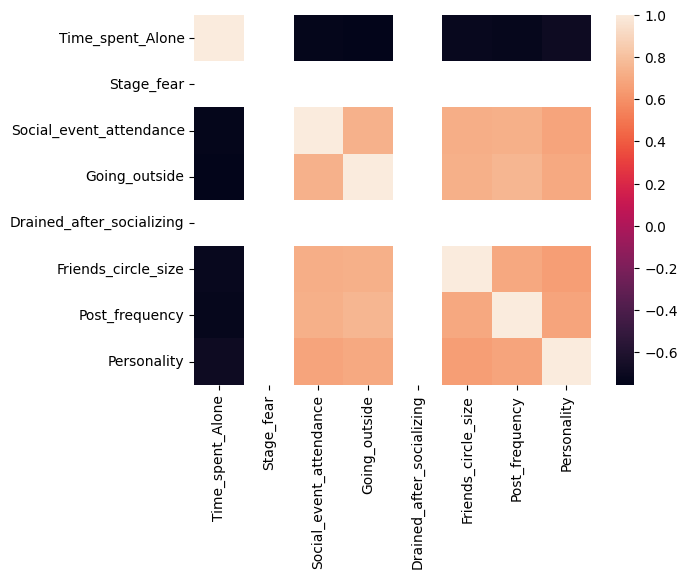

In [19]:
display(sns.heatmap(data.corr()))

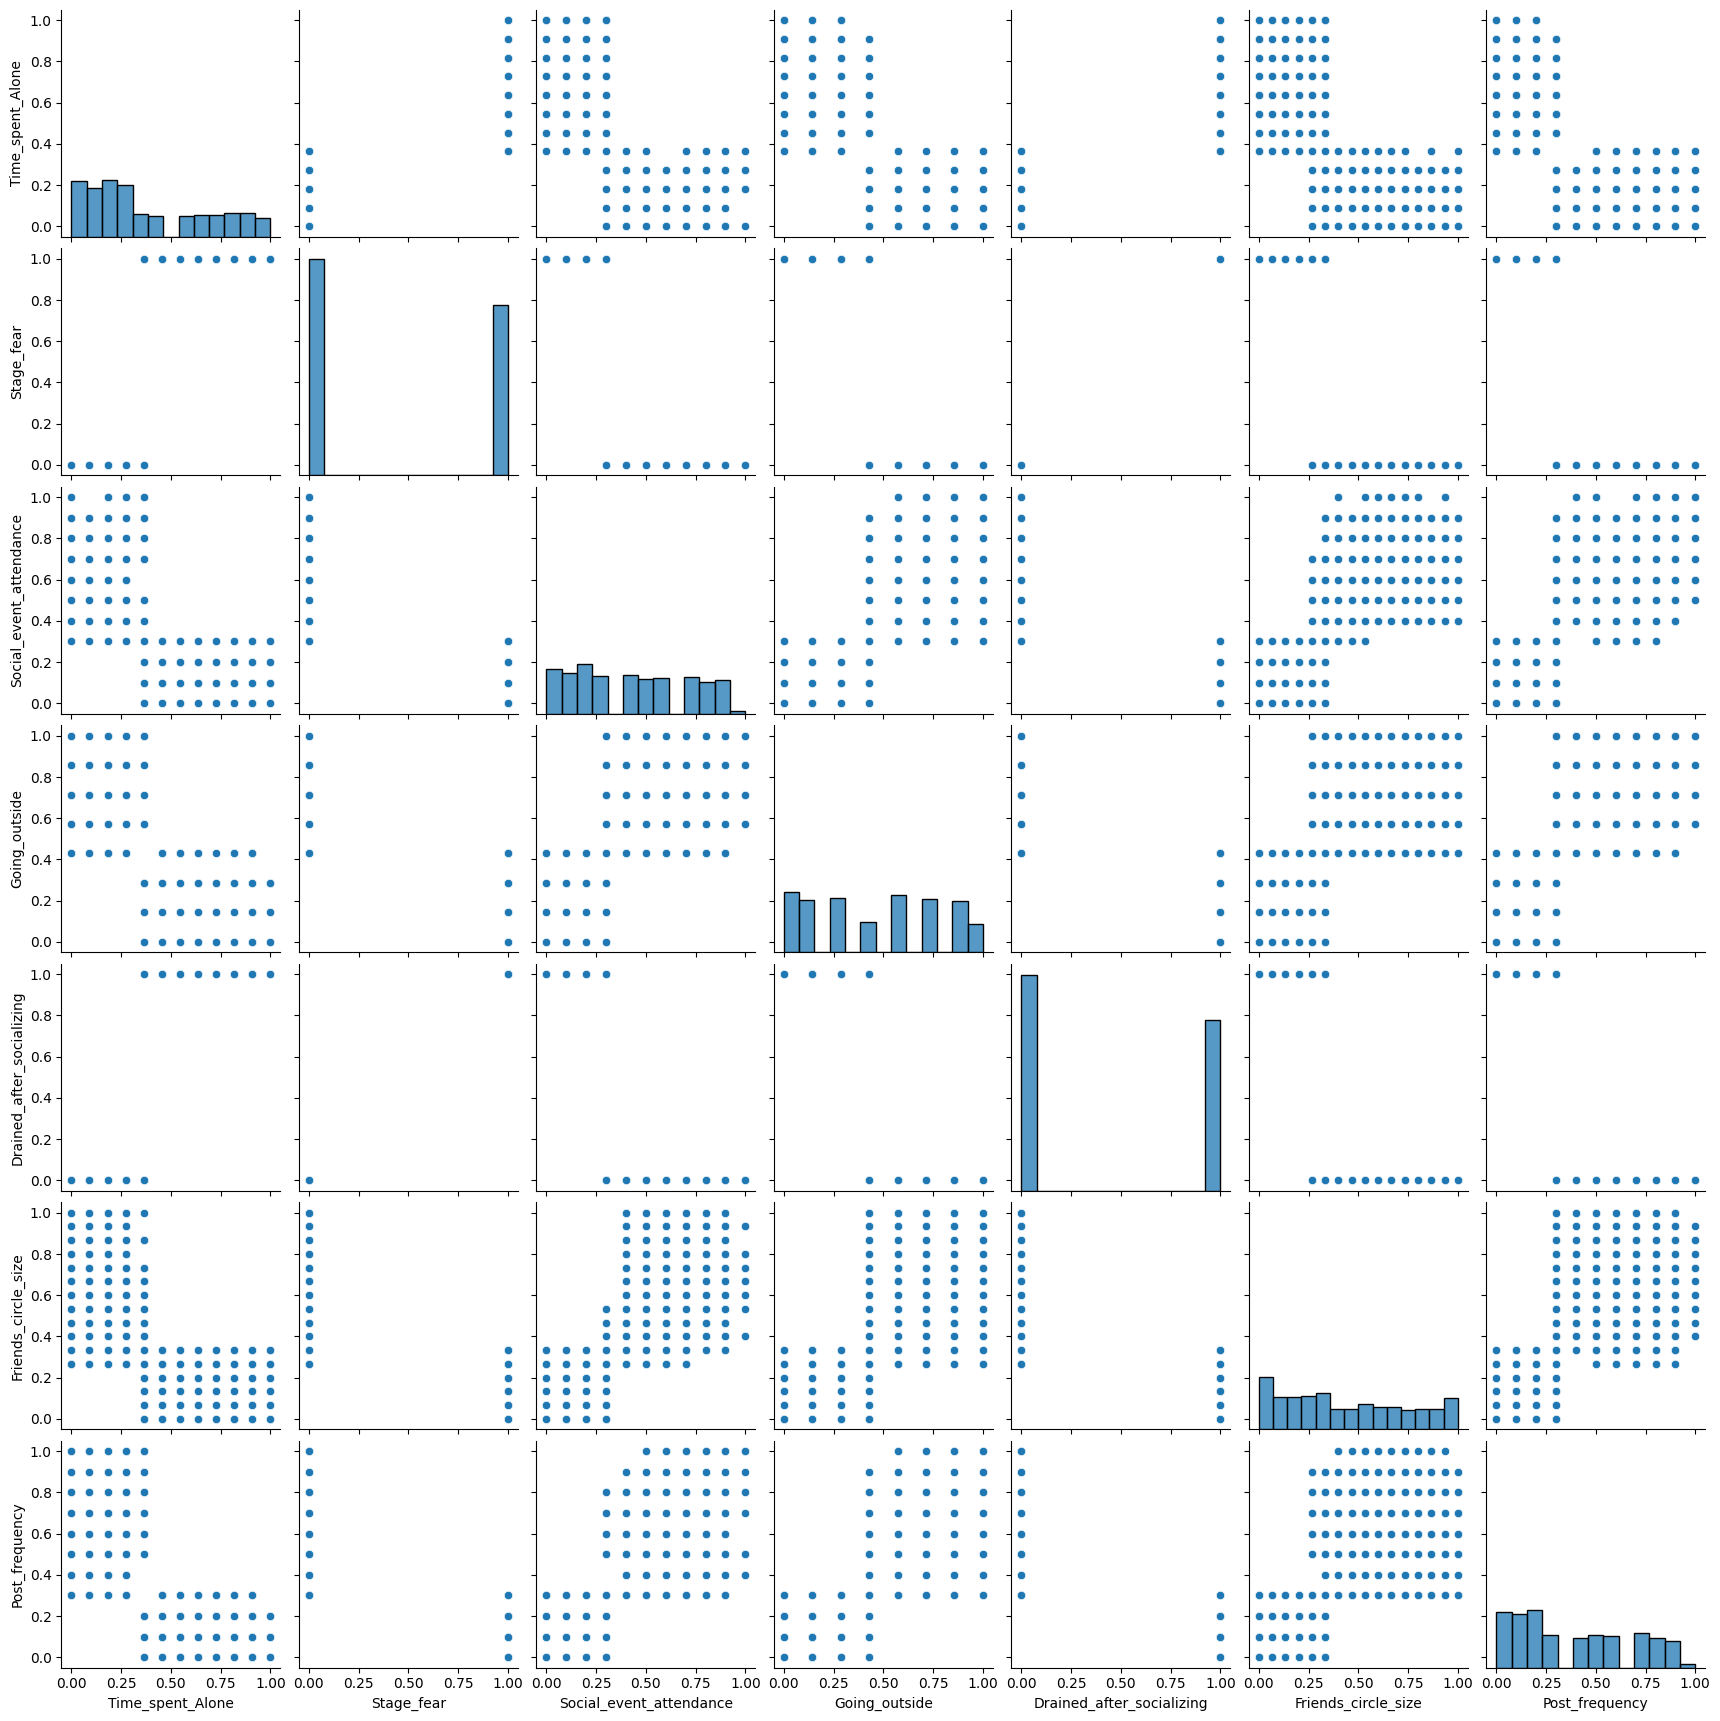

In [15]:
sns.pairplot(data)